# TP 4 : Analyse en composantes principales avec R

ACP = Analyse en Composantes Principales

## Un esprit sain dans un corps sain

Ce sujet vous donne les moyens de conserver un esprit sain dans un corps sain. Dans un premier temps, il s'agira de prendre les mesures de ce corps à maintenir en forme (données `body.csv`). Pour cela, il est bien connu qu'une activité physique régulière est bénéfique à de nombreux de points de vue (données `athle.csv`) à condition de l'accompagner par une alimentation saine et équilibrée et ce, dès le petit déjeuner (données `cereal.txt`). Pour compléter le tout, un peu de réflexion mathématique mettra le cerveau au niveau de votre corps aguerri et bien alimenté !

## 1. Données `body`

Les données `body` sont composées d'un relevé de 5 variables morphologiques (tour d'épaule, tour de poitrine, tour de taille, masse et taille) chez 20 individus. La première étape consiste à importer ce jeu de données dans R avec la fonction `read.table()` (nous pourrions aussi utiliser `read.csv()` ou `read.csv2()`).

In [1]:
data_body <- read.table("data/body.csv", # Nom du fichier à importer
                        header=TRUE,     # Utiliser la première ligne du fichier pour les noms des colonnes
                        sep=";",         # Séparateur de champs
                        dec=",",         # Séparateur décimal
                        row.names=1)     # Utiliser la première colonne pour les noms des lignes

Pour calculer une ACP sur les données, nous pouvons utiliser la fonction `prcomp()`. Nous stockons le résultat retourné dans un objet appelé `acp_body` de notre espace de travail.

In [2]:
acp_body <- prcomp(data_body)

# Quelques vérifications
cat("Classe de l'objet :", class(acp_body), "\n")
cat("Type de l'objet :", mode(acp_body), "\n")
cat("Test du type 'list' :", is.list(acp_body), "\n")

Classe de l'objet : prcomp 
Type de l'objet : list 
Test du type 'list' : TRUE 


Les composantes de l'objet `acp_body` sont visibles grâce à la fonction `names()`.

In [3]:
names(acp_body)

[1] "sdev"     "rotation" "center"   "scale"    "x"

Pour accéder à un de ces éléments, il faut utiliser l'opérateur `$`.

In [4]:
acp_body$sdev

[1] 15.989241  7.757795  4.846040  2.933938  2.002735

Une description détaillée des éléments contenue dans un objet de la classe `prcomp` est fournie dans l'aide de la fonction `prcomp()`.

In [5]:
help(prcomp)

prcomp                  package:stats                  R Documentation

_P_r_i_n_c_i_p_a_l _C_o_m_p_o_n_e_n_t_s _A_n_a_l_y_s_i_s

_D_e_s_c_r_i_p_t_i_o_n:

     Performs a principal components analysis on the given data matrix
     and returns the results as an object of class ‘prcomp’.

_U_s_a_g_e:

     prcomp(x, ...)
     
     ## S3 method for class 'formula'
     prcomp(formula, data = NULL, subset, na.action, ...)
     
     ## Default S3 method:
     prcomp(x, retx = TRUE, center = TRUE, scale. = FALSE,
            tol = NULL, rank. = NULL, ...)
     
     ## S3 method for class 'prcomp'
     predict(object, newdata, ...)
     
_A_r_g_u_m_e_n_t_s:

 formula: a formula with no response variable, referring only to
          numeric variables.

    data: an optional data frame (or similar: see ‘model.frame’)
          containing the variables in the formula ‘formula’.  By
          default the variables are taken from ‘environment(

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Que renvoie la fonction <code>summary()</code> appliquée à l'objet <code>acp_body</code> ?</li>
        <li>Utilisez la fonction <code>plot()</code> avec l'objet <code>acp_body</code> pour représenter l'éboulis des valeurs propres. Combien de dimensions semble-t-il raisonnable de retenir pour les représentations graphiques ?</li>
        <li>À l'aide de la fonction <code>biplot</code>, représenter simultanément les individus et les variables sur le premier plan principal (PC1-PC2). Commenter.</li>
        <li>Représenter seulement les individus dans le premier plan principal (voir l'attribut <code>x</code> de l'objet <code>acp_body</code>) avec un codage en 2 couleurs dépendant d'un facteur <code>sexe</code> (les 10 premiers individus étant des hommes, les 10 suivants des femmes) :<br>
            <center><img src="img/body_plan_principal.png"></center></li>
    </ol>
</div>

In [6]:
# À FAIRE

#1
summary(acp_body)

Importance of components:
                           PC1    PC2     PC3     PC4    PC5
Standard deviation     15.9892 7.7578 4.84604 2.93394 2.0027
Proportion of Variance  0.7264 0.1710 0.06673 0.02446 0.0114
Cumulative Proportion   0.7264 0.8974 0.96414 0.98860 1.0000

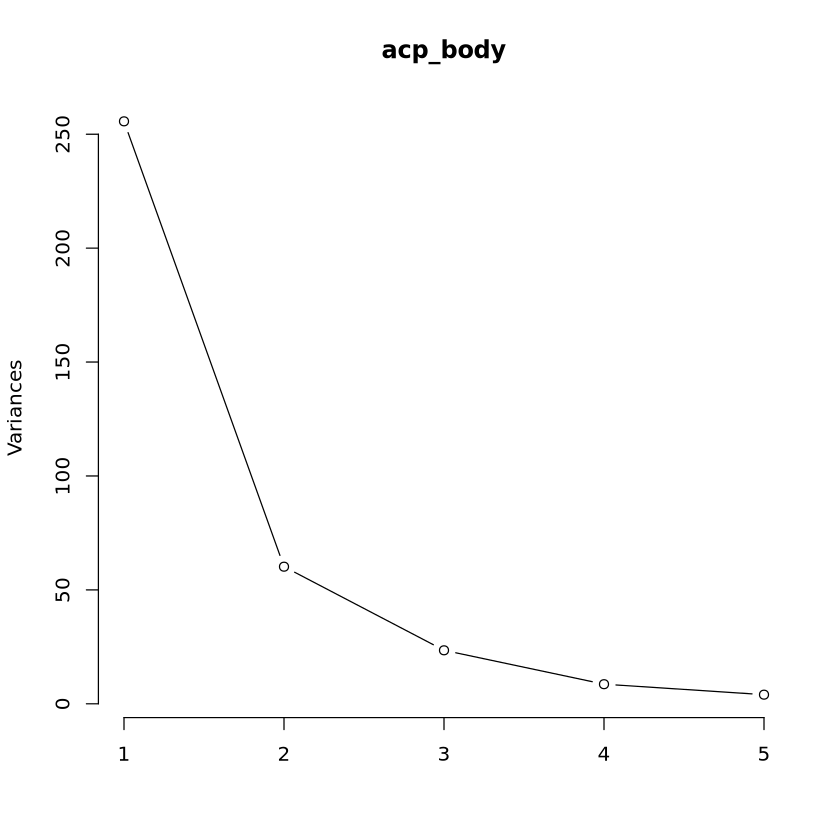

In [16]:
plot(acp_body, type = "l")


<div style="border : 2px solid #2196F3; padding: 10px; border-radius: 8px; background-color: #E3F2FD;">

Comment déterminer le nombre de variables raisonnable de retenir à partir de l'éboulis des valeurs propres ? 

Règle du coude : identifier le point où la pente de courbe "casse", les composantes avant sont jugées pertinentes, celles d'après n'apporte que du bruit. 

Fixer un seuil de variance cumulée (souvent 70 à 80%) : on garde le nombre minimal de composantes qui dépassent ce seuil. 

</div>


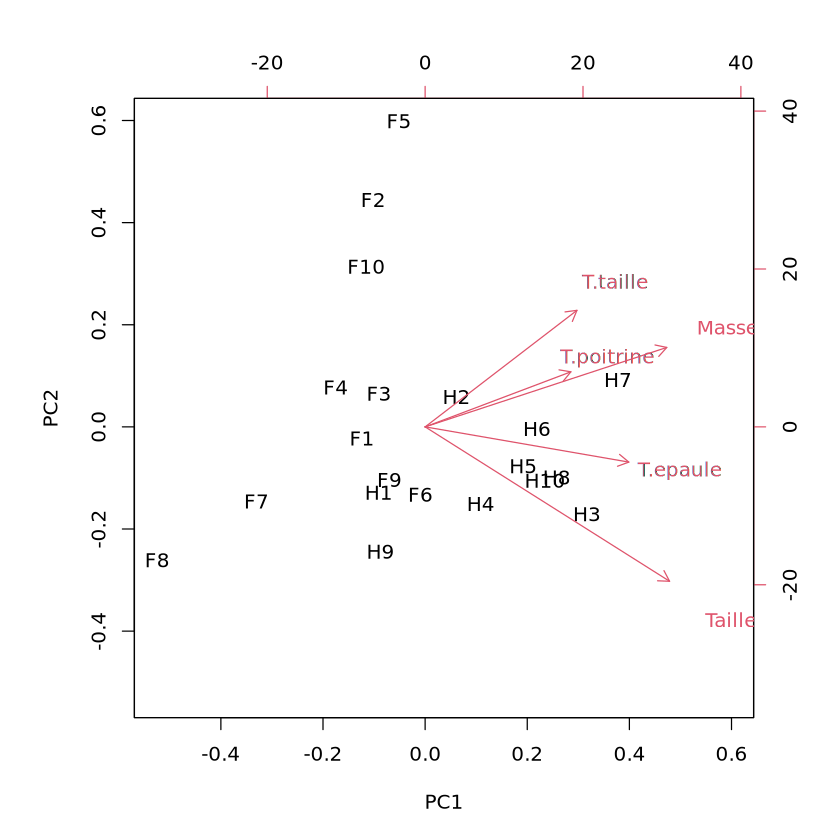

In [10]:
biplot(acp_body)

Masse, Tour de taille et Taille de la poitrine sont proches les unes des autres et pointent dans la même direction : ainsi ces variables sont correlées. 

Les individus proches les uns des autres (points sur le graphe) sont similaires en terme de morphologie. 

## 2. Données `athle`

Les données `athle` sont constituées d'un relevé des records nationaux d'athlétisme en 2010 de 26 pays pour 9 épreuves de course, du 100m au marathon.

In [11]:
# Importation des données
data_athle <- read.table("data/athle.csv", header=TRUE, dec=",", row.names=1)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer une ACP sur ces données <code>data_athle</code>.</li>
        <li>Représenter l'éboulis des valeurs propres et le diagramme biplot. Commenter.</li>
        <li>Quel(s) pré-traitement(s) vous semble(nt) nécessaire(s) (transformation de données, suppression d'observations atypiques, ...) ? Effectuer quelques manipulations pour produire des résultats d'ACP plus parlants.</li>
    </ol>
</div>

In [12]:
# À FAIRE
#1

acp_athle <- prcomp(data_athle)

# Quelques vérifications
cat("Classe de l'objet :", class(acp_athle), "\n")
cat("Type de l'objet :", mode(acp_athle), "\n")
cat("Test du type 'list' :", is.list(acp_athle), "\n")

Classe de l'objet : prcomp 
Type de l'objet : list 
Test du type 'list' : TRUE 


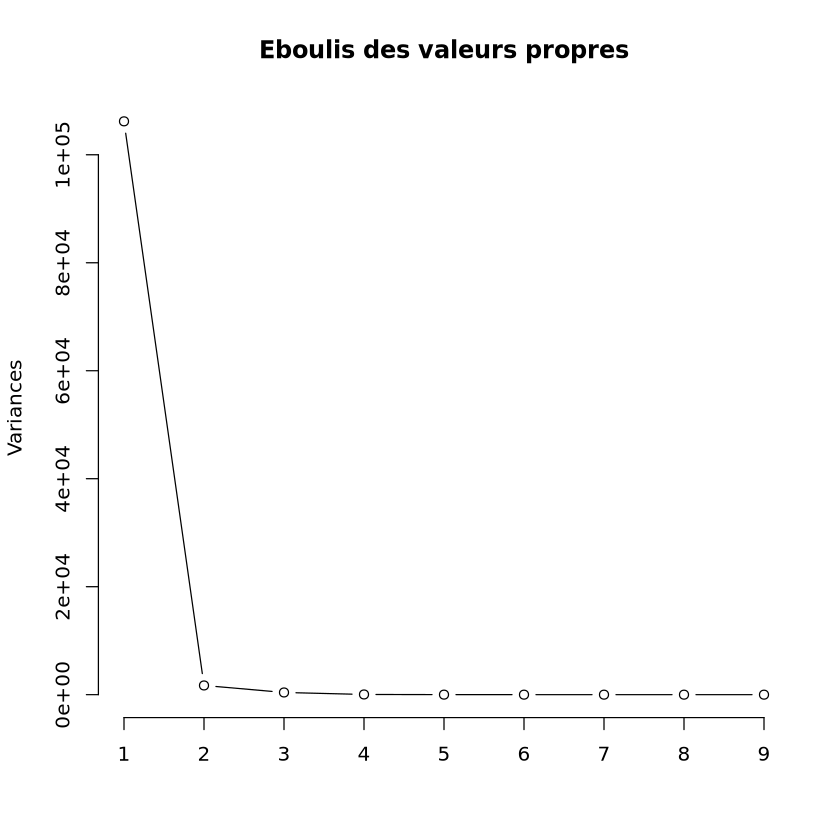

In [14]:
#2 - éboulis des valeurs propres

plot(acp_athle, type = "l", main = "Eboulis des valeurs propres")

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”


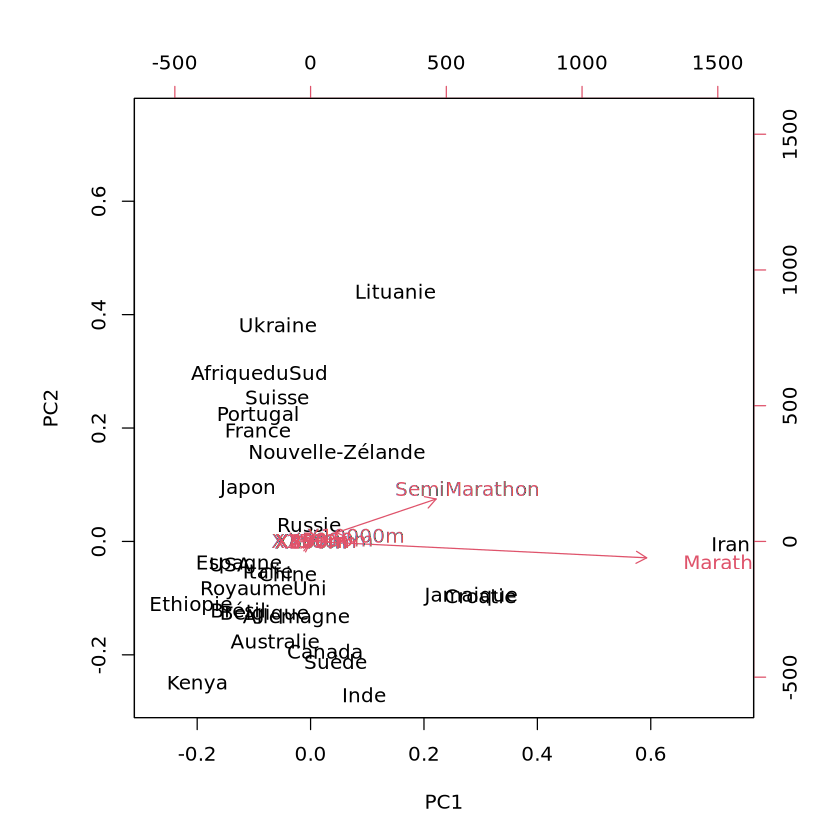

In [17]:
biplot(acp_athle)

La cassure sur l'éboulis des valeurs propres montre que seule la premère variable est utile pour décrire l'échantillon. 

Sur le biplot, les vecteurs sont très déséquilibrés : le Marathon est bien plus long que le Semi-Marathon. Les variables sont sur des échelles différentes (temps ou longueur) : l'ACP est ainsi dominée par les variables avec la plus grande valeur absolues, il faut effectuer une mise à l'échelle.

Il faut ainsi centrer et réduire les variables. 

In [ ]:
#centrer et réduire 

data_scaled <- scale(data_athle, center = TRUE, scale = TRUE)

#vérification 

head(data_scaled)
apply(data_scaled, 2, mean)
apply(data_scaled, 2, sd

,X100m,X200m,X400m,X800m,X1500m,X5000m,X10000m,SemiMarathon,Marathon
Australie,-0.6824449,-0.4007912,-0.7519192,0.2035705,-0.31150446,-0.8251465,-0.15556257,-0.5954363,-0.2763340
Belgique,-0.2376201,-0.1208998,-0.2069743,-0.1591363,0.28285068,-1.1760971,-1.15814789,-0.5703720,-0.3783611
Brésil,-0.3364700,-0.7668029,-0.8745318,-1.5629462,0.04182187,0.5479112,-0.19868740,-0.8377239,-0.6252009
RoyaumeUni,-0.9789948,-0.8098631,-0.7791664,-1.5898134,-0.93872716,-0.5554077,-0.46600777,-0.5369531,-0.4013995
Canada,-1.1272697,-0.1639600,-0.6701774,-0.2800386,-0.37997855,0.2306055,0.01265105,-0.1944085,0.1778512
Chine,0.5037546,0.6326538,0.4333360,1.5737964,0.92924613,0.8791389,0.38738171,-0.3197297,-0.1973452


X100m         X200m         X400m         X800m        X1500m 
 3.326874e-16  2.356805e-15  3.469447e-18  3.455102e-16  3.593567e-15 
       X5000m       X10000m  SemiMarathon      Marathon 
 4.920902e-16 -2.340947e-15 -1.472964e-15  1.151856e-15

X100m        X200m        X400m        X800m       X1500m       X5000m 
           1            1            1            1            1            1 
     X10000m SemiMarathon     Marathon 
           1            1            1

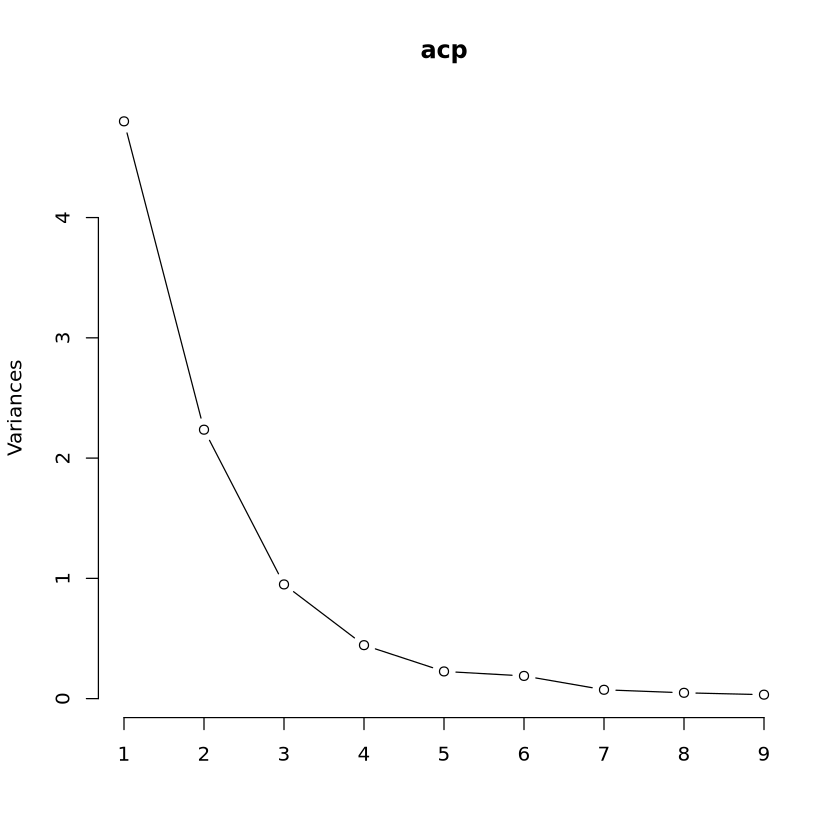

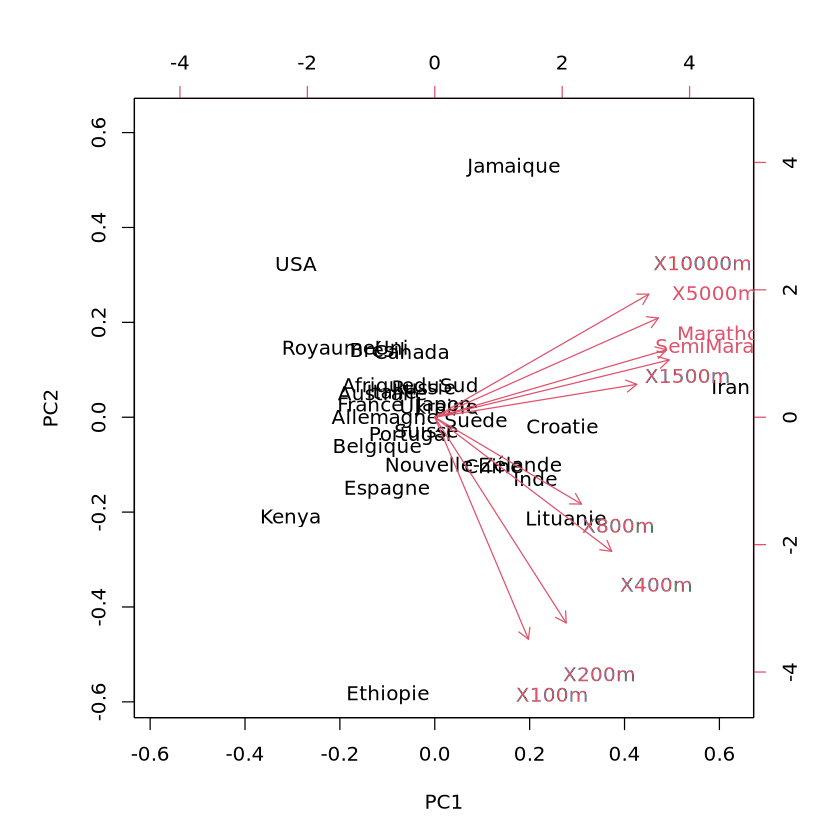

In [23]:
acp <- prcomp(data_scaled)
plot(acp, type = "l")
biplot(acp)

## 3. Données `cereal`

Les données `cereal` contiennent la composition (relevée en 1993 aux États-Unis) selon 9 variables quantitatives de 77 types de paquets de céréales consommés au petit-déjeuner. Le fabriquant (variable `mfr`) est également disponible dans le jeu de données.

  * `mfr` Manufacturer of cereal (A: American Home Food Products, G: General Mills, K: Kelloggs, N: Nabisco, P: Post, Q: Quaker Oats, R: Ralston Purina).
  * `calories` Calories per serving.
  * `protein` Grams of protein.
  * `fat` Grams of fat.
  * `sodium` Milligrams of sodium.
  * `fiber` Grams of dietary fiber.
  * `carbo` Grams of complex carbohydrates.
  * `sugars` Grams of sugars.
  * `potass` Milligrams of potassium.
  * `vitamins` Vitamins and minerals (0, 25 or 100, indicating the typical percentage of FDA recommended).

L'analyse de ce jeu de données a fait l'objet d'un concours proposé par l'*American Statistical Association* (sections *Statistical Computing* et *Statistical Graphics*) en 1993 sous le titre "*Serial Correlation or Cereal Correlation ?* " :

*Every two years the Section on Statistical Graphics sponsors a special exposition where one or more data sets are made available, analyzed by anyone interested and presented in a special poster session at the Annual Meeting.*

In [1]:
# Importation des données
data_cereal <- read.table("data/cereal.txt", header=TRUE, row.names=1)

In [2]:
# Visualisation du format de notre tableau de données
head(data_cereal)

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
100%_Bran,N,70,4,1,130,10.0,5.0,6,280,25
100%_Natural_Bran,Q,120,3,5,15,2.0,8.0,8,135,0
All-Bran,K,70,4,1,260,9.0,7.0,5,320,25
All-Bran_with_Extra_Fiber,K,50,4,0,140,14.0,8.0,0,330,25
Almond_Delight,R,110,2,2,200,1.0,14.0,8,90,25
Apple_Cinnamon_Cheerios,G,110,2,2,180,1.5,10.5,10,70,25


Plusieurs packages proposent des fonctions pour calculer une ACP en offrant d'autres options que celles proposées par la fonction `prcomp()`. Un package très populaire dédié à l'analyse exploratoire de données multivariées est [`FactoMineR`](http://factominer.free.fr/) qui est maintenu par une équipe française (d'où les noms français de certains éléments). Nous vous proposons d'utiliser ce package pour le jeu de données `cereal`.

In [3]:
# Chargement du package FactoMineR
library(FactoMineR)

Le calcul de l'ACP se fait avec la fonction `PCA()` et nous pouvons utiliser l'argument `quali.sup=` pour omettre les variables qualitatives (`FactoMineR` parle de *variable supplémentaire*).

In [4]:
R.home()
version
.libPaths()

[1] "/home/lescaron/anaconda3/envs/myenv/lib/R"

               _                           
platform       x86_64-conda-linux-gnu      
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               

[1] "/home/lescaron/anaconda3/envs/myenv/lib/R/library"

In [5]:
# Calcul de l'ACP


acp_cereal <- PCA(data_cereal, quali.sup=1)

La fonction `plot()` affiche le résultat dans le plan principal pour représenter les individus (`choix="ind"`) ou les variables (`choix="var"`).

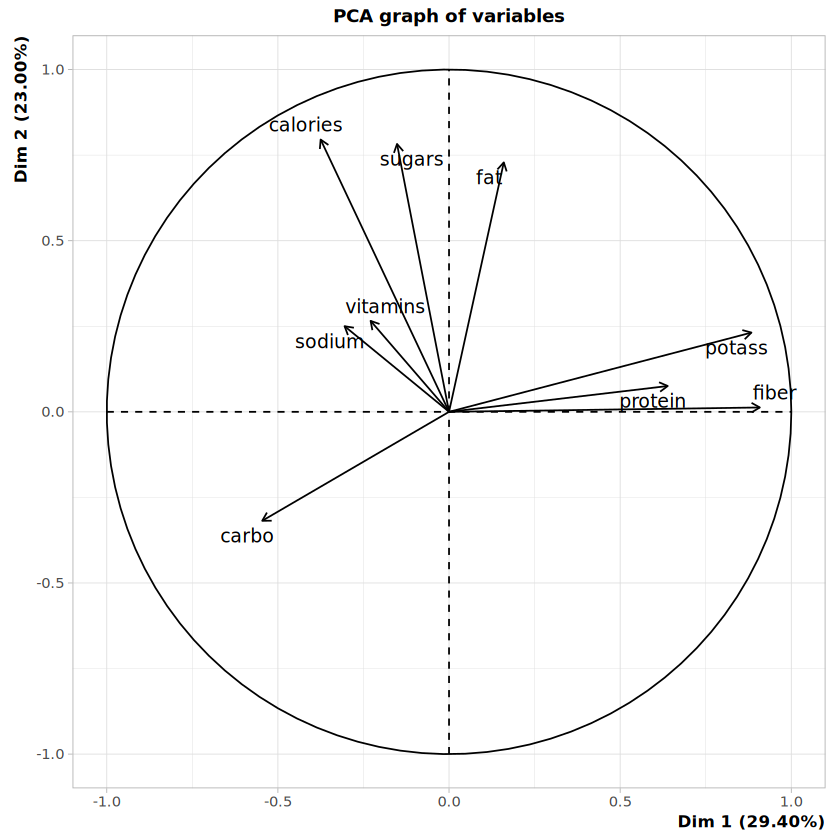

In [7]:
# Représentation des variables dans le plan principal
plot(acp_cereal, choix="var")

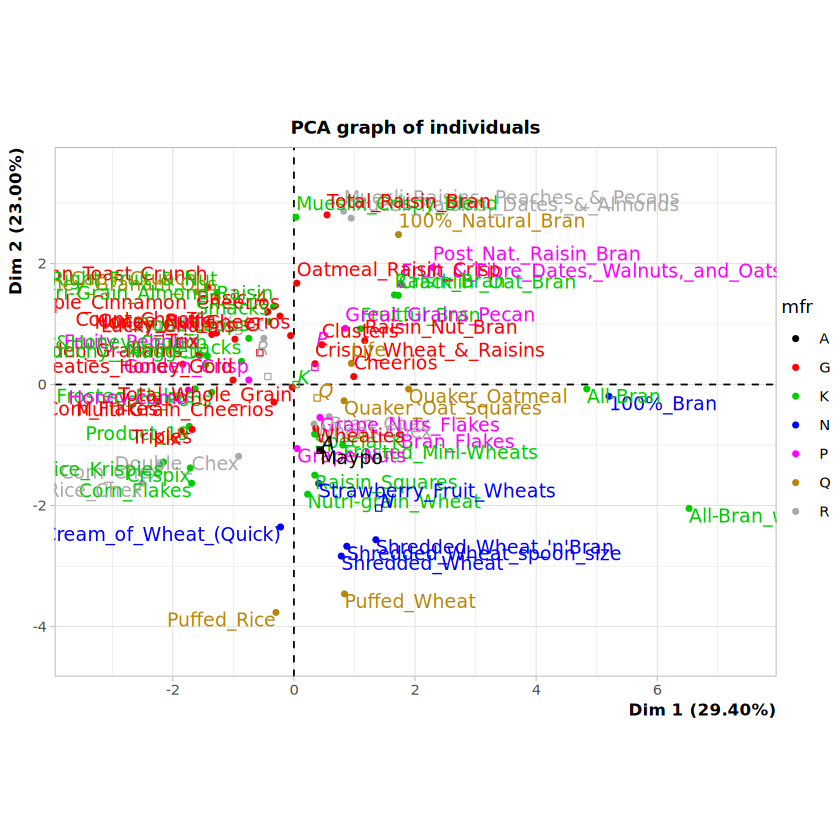

In [8]:
# Représentation des individus dans le plan principal en codant en couleur le fabriquant (colonne 1)
plot(acp_cereal, choix="ind", habillage=1)

<div class="alert alert-block alert-success">
    Pour suivre la recommandation <i>"Ne mange pas trop gras, trop salé, trop sucré"</i>, quelle(s) céréale(s) vaut-il mieux consommer ? Dans quelle zones du graphique de l'ACP se trouvent les céréales à éviter ?
</div>

Les calories, les sucres et le sel (sodium) sont en haut à gauche du graphe. Il faut ainsi éviter les céréales dans cette zone : Dim 1 < 0 et Dim 2 > 0. Le gras est un peu plus vers le droite : pour 0 < Dim 1 < 0.5 et Dim 2 < 2. 

## 4. Aspects mathématiques

Nous allons travailler avec une matrice à 5 lignes et 3 colonnes dont les éléments sont issus d'un tirage aléatoire sans remise d'entiers entre 1 et 15.

In [10]:
X <- matrix(sample(1:15, size=15), ncol=3)

X

14,11,7
12,6,4
2,13,15
1,3,5
8,9,10


Nous commençons par calculer l'ACP et représenter le diagramme biplot.

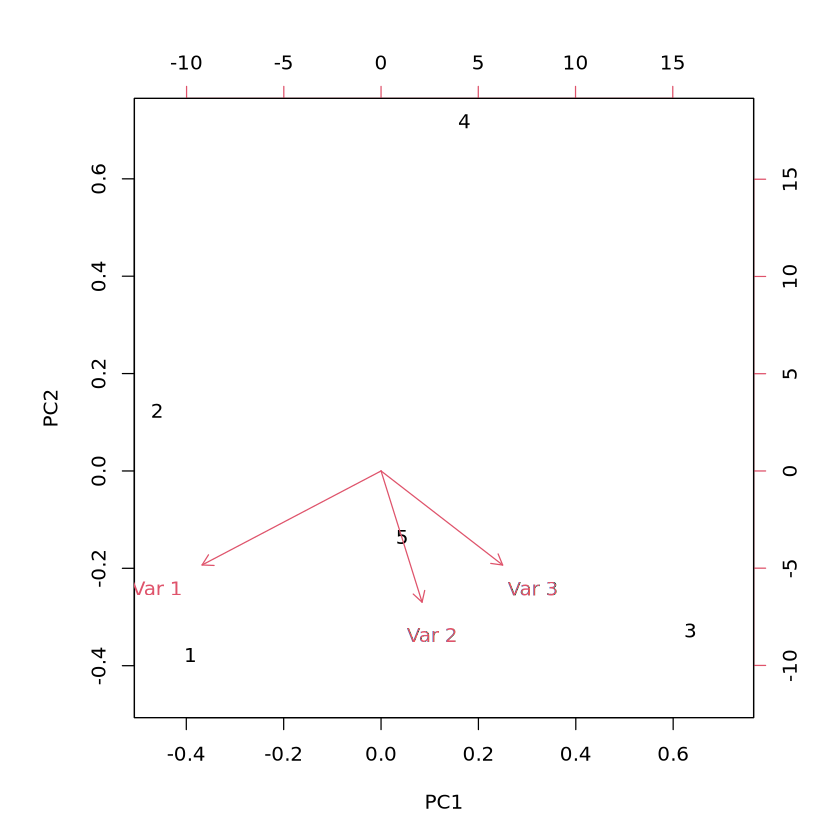

In [11]:
acp <- prcomp(X)
biplot(acp)

L'objectif des manipulations suivantes consiste à retrouver les valeurs issues de l'ACP présentes dans les composants de l'objet `acp` ou dans le résumé de l'objet obtenu avec la fonction `summary()`.

In [12]:
acp

Standard deviations (1, .., p=3):
[1] 6.3304078 5.3708037 0.6167692

Rotation (n x k) = (3 x 3):
            PC1        PC2        PC3
[1,] -0.8126466 -0.5031462  0.2940227
[2,]  0.1862934 -0.7023575 -0.6870144
[3,]  0.5521778 -0.5035254  0.6645012

In [13]:
summary(acp)

Importance of components:
                          PC1    PC2     PC3
Standard deviation     6.3304 5.3708 0.61677
Proportion of Variance 0.5783 0.4162 0.00549
Cumulative Proportion  0.5783 0.9945 1.00000

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Une ACP étant une diagonalisation de la matrice de covariance, vérifier que les informations renvoyées par <code>prcomp()</code> sont similaires à celles calculées par la fonction <code>eigen()</code>. Commenter les différences si il y en a.</li>
        <li>Où retrouve-t-on les vecteurs propres renvoyés par <code>eigen()</code> dans l'objet <code>acp</code> ? Le signe de ces vecteurs est-il important ?</li>
        <li>Retrouver les résultats de l'ACP en procédant cette fois à la décomposition en valeurs singulières (fonction <code>svd()</code>) stockée dans un objet <code>s</code>.</li>
        <li>Vérifier que les vecteurs singuliers à droite (<code>s&dollar;v</code>) sont bien similaires au composant <code>rotation</code> du résultat de <code>prcomp()</code> et également aux vecteurs propres de la matrice de covariance (éventuellement au signe près).</li>
        <li>Concernant les valeurs singulières, vérifier que l'on retrouve les écarts-types renvoyés par <code>prcomp()</code> et les racines carrées des valeurs propres de la matrice de covariance.</li>
        <li>Retrouver les coordonnées des individus sur les composantes principales données par <code>acp&dollar;x</code>. Pour cela, nous pouvons par exemple faire le produit matriciel des données initiales et des vecteurs propres de la matrice de covariance.</li>
        <li>Procéder à des calculs analogues pour vérifier les calculs d'une ACP réduite (diagonalisation de la matrice des corrélations).</li>
    </ol>
</div>

In [ ]:
# À FAIRE

#1 faire une ACP "à la main" avec eigen

X_scaled <- scale(X, center = TRUE, scale = FALSE)

S <- cov(X_scaled) #matrice de covariance
diag <- eigen(S) #décomposition en valeurs propres

diag$values #variance pour chaque axe
diag$vectors #vecteurs propres



[1] 40.0740634 28.8455323  0.3804043

0.8126466,0.5031462,0.2940227
-0.1862934,0.7023575,-0.6870144
-0.5521778,0.5035254,0.6645012


In [17]:
#comparaison avec l'ACP classique

acp$sdev^2
diag$values

acp$rotation
diag$vectors

# Vérification des écarts
cat("\n=== Différence valeurs propres ===\n")
print(acp$sdev^2 - diag$values)

cat("\n=== Produit scalaire entre vecteurs ===\n")
print(t(acp$rotation) %*% diag$vectors)

[1] 40.0740634 28.8455323  0.3804043

[1] 40.0740634 28.8455323  0.3804043

PC1,PC2,PC3
-0.8126466,-0.5031462,0.2940227
0.1862934,-0.7023575,-0.6870144
0.5521778,-0.5035254,0.6645012


0.8126466,0.5031462,0.2940227
-0.1862934,0.7023575,-0.6870144
-0.5521778,0.5035254,0.6645012



=== Différence valeurs propres ===
[1]  1.421085e-14 -3.552714e-15 -1.515454e-14

=== Produit scalaire entre vecteurs ===
             [,1]          [,2]          [,3]
PC1 -1.000000e+00 -3.687703e-17  1.763603e-16
PC2  2.311193e-16 -1.000000e+00 -9.131165e-16
PC3  8.132634e-17 -1.066032e-15  1.000000e+00


Les variances expliquées sont identiques aux valeurs propres de eigen(). Les vecteurs propres corresondent  ceux de eigen() avec les signes inversés pour les deux premières composantes principales (cela vient du fait que l'orientation des vecteurs est arbitraire). Le produit scalaire montre bien que les directions sont les mêmes (on a une matrice diagonale de 1).

In [22]:
#3 utilisation de la décomposition en valeurs singulières

s <- svd(X_scaled) 

# Variances expliquées (sdev^2 de prcomp = D^2/(n-1))
cat("=== Variances expliquées ===\n")
print(acp$sdev^2)
print(s$d^2 / (nrow(X) - 1)) 
# Loadings (rotation = V de la SVD)
cat("\n=== Loadings ===\n")
print(acp$rotation)
print(s$v) #s$v est le vecteur singulier à droite
print(diag$vectors) #vecteurs propres de la matrice de covariance


# Coordonnées individus (x = U D)
cat("\n=== Coordonnées individus ===\n")
print(head(acp$x))
print(head(s$u %*% diag(s$d)))




=== Variances expliquées ===
[1] 40.0740634 28.8455323  0.3804043
[1] 40.0740634 28.8455323  0.3804043

=== Loadings ===
            PC1        PC2        PC3
[1,] -0.8126466 -0.5031462  0.2940227
[2,]  0.1862934 -0.7023575 -0.6870144
[3,]  0.5521778 -0.5035254  0.6645012
           [,1]       [,2]       [,3]
[1,] -0.8126466 -0.5031462  0.2940227
[2,]  0.1862934 -0.7023575 -0.6870144
[3,]  0.5521778 -0.5035254  0.6645012
           [,1]      [,2]       [,3]
[1,]  0.8126466 0.5031462  0.2940227
[2,] -0.1862934 0.7023575 -0.6870144
[3,] -0.5521778 0.5035254  0.6645012

=== Coordonnées individus ===
           PC1       PC2        PC3
[1,] -5.541718 -4.542664 -0.6430888
[2,] -6.504425  1.485992  0.2104341
[3,]  9.000050 -3.937828 -0.2293808
[4,]  2.427985  8.624148 -0.2982717
[5,]  0.618108 -1.629648  0.9603072
          [,1]      [,2]       [,3]
[1,] -5.541718 -4.542664 -0.6430888
[2,] -6.504425  1.485992  0.2104341
[3,]  9.000050 -3.937828 -0.2293808
[4,]  2.427985  8.624148 -0.2982717


## 4. PCR vs PLS

Les but ici est de comparer les deux approches sur le jeux de données `DatairSDD`. Ce jeux de données contient des informations relative à la qualité de l'air. 
On cherche à expliquer la densité de monoxyne d'azote en fonction des autres variables. On comparera alors plusieurs méthodes de régression.

In [ ]:
#install.packages("pls")
library("pls")

#librairie qui contient les fonctions pcr() et plsr()


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li> Ajuster un modèle linéaire. </li>
        <li> Effectuer un régression en composante principale avec la fonction <code>pcr()</code>. </li>
        <li> Effectuer une regression PLS avec la fonction <code>plsr()</code>. </li>
        <li> Comparer les erreurs de ces trois modèles en termes d'erreur quadratique moyenne en fonction de nombre de composantes utilisées. <code>RMESP()</code> </li>
    </ol>
</div>

In [ ]:
# À FAIRE

#1
data <- read.csv("data/DatairSDD.csv")

head(data)

str(data) #affiche les colonnes 

#on veut prédire la densité de monoxyde d'azote en fonction des autres variables 
#donc notre colonne Y de réponse est NOx.GT (colonne 4)

,X,PT08.S1.CO.,NMHC.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1360,150,1046,166,1056,113,1692,1268
2,2,1292,112,955,103,1174,92,1559,972
3,3,1402,88,939,131,1140,114,1555,1074
4,4,1376,80,948,172,1092,122,1584,1203
5,5,1272,51,836,131,1205,116,1490,1110
6,6,1197,38,750,89,1337,96,1393,949


'data.frame':	200 obs. of  9 variables:
 $ X            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ PT08.S1.CO.  : int  1360 1292 1402 1376 1272 1197 1185 1136 1094 1010 ...
 $ NMHC.GT.     : int  150 112 88 80 51 38 31 31 24 19 ...
 $ PT08.S2.NMHC.: int  1046 955 939 948 836 750 690 672 609 561 ...
 $ NOx.GT.      : int  166 103 131 172 131 89 62 62 45 -200 ...
 $ PT08.S3.NOx. : int  1056 1174 1140 1092 1205 1337 1462 1453 1579 1705 ...
 $ NO2.GT.      : int  113 92 114 122 116 96 77 76 60 -200 ...
 $ PT08.S4.NO2. : int  1692 1559 1555 1584 1490 1393 1333 1333 1276 1235 ...
 $ PT08.S5.O3.  : int  1268 972 1074 1203 1110 949 733 730 620 501 ...


Data: 	X dimension: 200 8 
	Y dimension: 200 1
Fit method: svdpc
Number of components considered: 8

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           121.7    62.35    60.17    37.65    34.81    33.41    33.51
adjCV        121.7    62.34    60.18    37.55    34.73    33.33    33.42
       7 comps  8 comps
CV       32.91    32.75
adjCV    32.79    32.60

TRAINING: % variance explained
         1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X          70.12    83.99    92.38    96.89    98.41    99.35    99.74    100.0
NOx.GT.    73.58    75.50    91.47    92.41    93.07    93.08    93.64     93.8


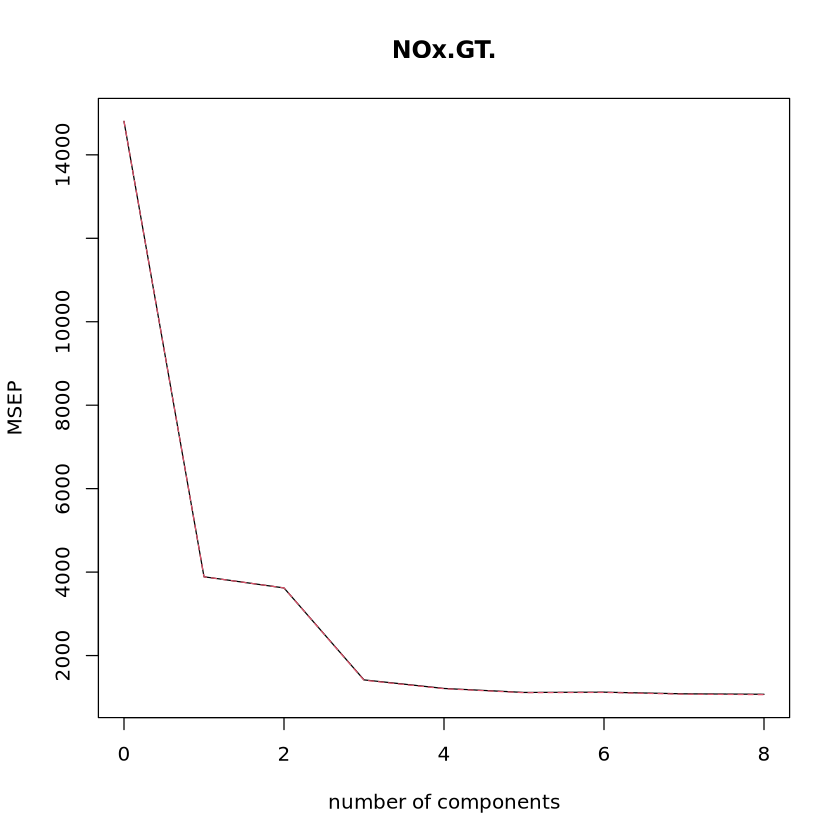

In [ ]:
# === PCR ===

model_pcr <- pcr(NOx.GT. ~ ., data = data, scale = TRUE, validation = "CV")
summary(model_pcr)

#Graphique de la Mean Squarred Error of Prediction (en fonction du nombre de composantes principales)
# permet de choisir le nombre optimal de composantes pour la régression 
validationplot(model_pcr, val.type = "MSEP")



Data: 	X dimension: 200 8 
	Y dimension: 200 1
Fit method: kernelpls
Number of components considered: 8

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           121.7    57.18    36.25    34.24    32.84    32.77    32.65
adjCV        121.7    57.16    36.11    34.14    32.80    32.67    32.52
       7 comps  8 comps
CV       32.70    32.79
adjCV    32.56    32.64

TRAINING: % variance explained
         1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X          69.87    79.60    91.71    95.79    98.19    98.78    99.49    100.0
NOx.GT.    78.07    92.08    92.79    93.24    93.54    93.79    93.80     93.8


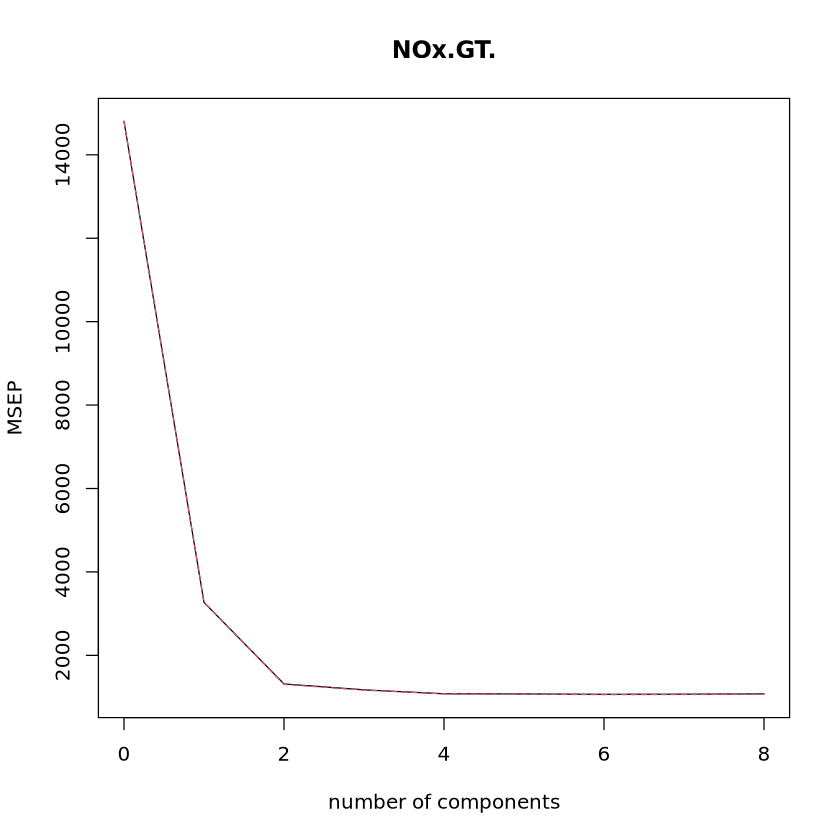

In [29]:
# === PLS ===

model_pls <- plsr(NOx.GT. ~ ., data = data, scale = TRUE, validation = "CV")
summary(model_pls)

validationplot(model_pls, val.type = "MSEP")

In [ ]:
# === Comparaison des performances ===

cat("\n--- RMSEP PCR ---\n") #RMSEP = root mean squarred error of prediction (racine carrée de l'erreur quadratique moyenne de prédiction)
print(RMSEP(model_pcr))

cat("\n--- RMSEP PLS ---\n")
print(RMSEP(model_pls))


--- RMSEP PCR ---
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           121.7    62.35    60.17    37.65    34.81    33.41    33.51
adjCV        121.7    62.34    60.18    37.55    34.73    33.33    33.42
       7 comps  8 comps
CV       32.91    32.75
adjCV    32.79    32.60

--- RMSEP PLS ---
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           121.7    57.18    36.25    34.24    32.84    32.77    32.65
adjCV        121.7    57.16    36.11    34.14    32.80    32.67    32.52
       7 comps  8 comps
CV       32.70    32.79
adjCV    32.56    32.64


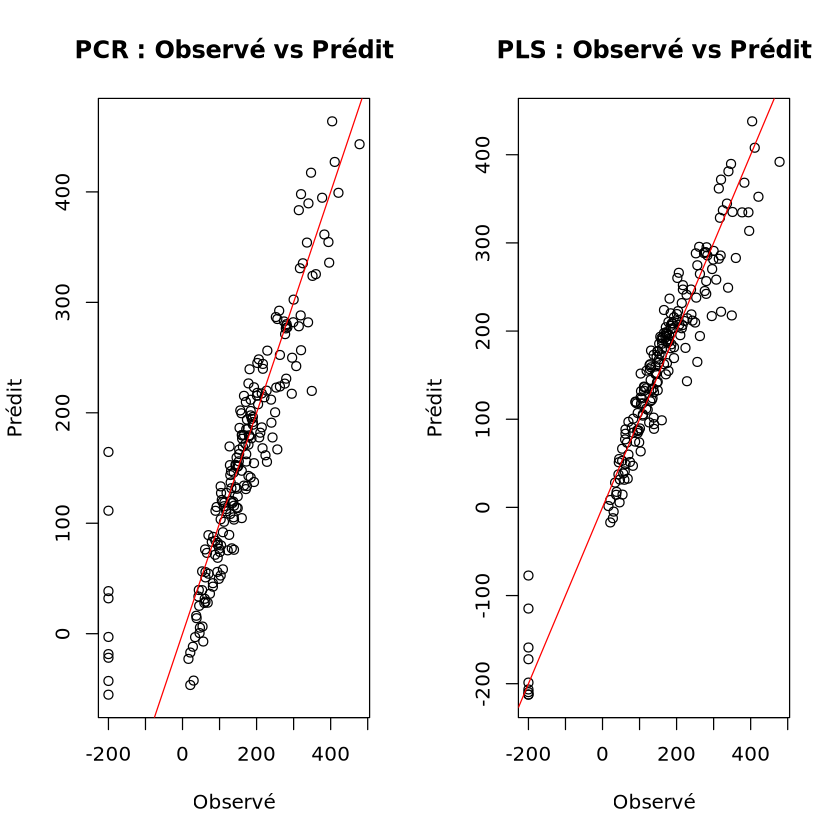

In [34]:
# === Prédictions avec 2 composantes

pred_pcr <- predict(model_pcr, ncomp = 2, newdata = data)
pred_pls <- predict(model_pls, ncomp = 2, newdata = data)

#Graphiques :

par(mfrow=c(1,2))  # deux graphiques côte à côte
plot(data$NOx.GT, pred_pcr,
     main="PCR : Observé vs Prédit",
     xlab="Observé", ylab="Prédit")
abline(0,1,col="red")

plot(data$NOx.GT, pred_pls,
     main="PLS : Observé vs Prédit",
     xlab="Observé", ylab="Prédit")
abline(0,1,col="red")


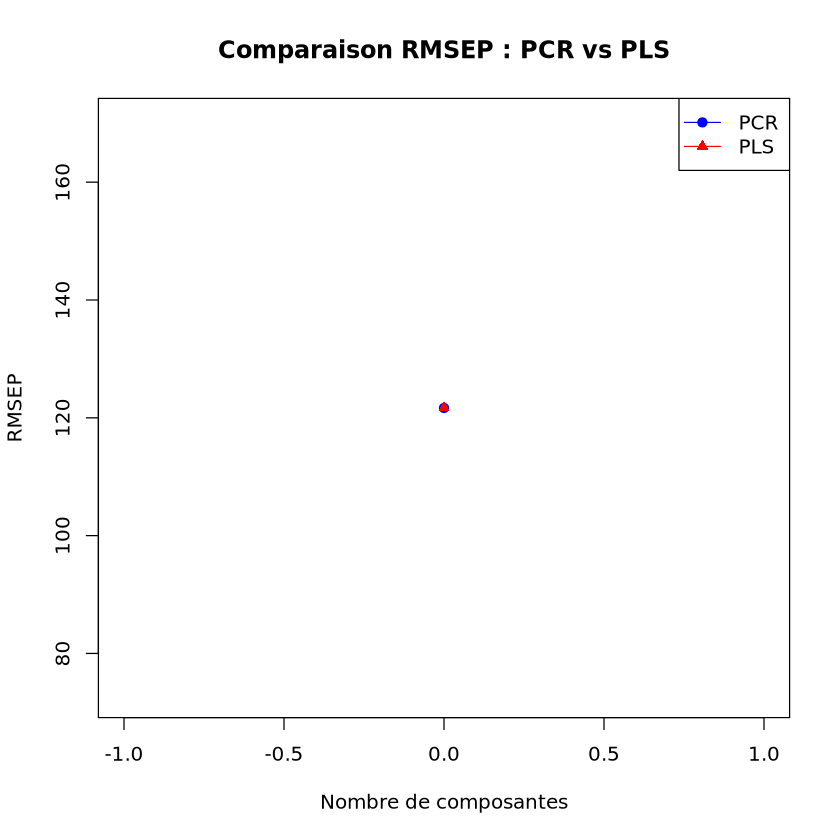

In [37]:
# === Compraison en terme d'erreur quadratique moyenne ===

# PCR
rmsep_pcr <- RMSEP(model_pcr)$val[1,,1]   # RMSEP par composante
# PLS
rmsep_pls <- RMSEP(model_pls)$val[1,,1]


ncomp <- 0:(length(rmsep_pcr)-1)  # 0,1,2,... composantes

plot(ncomp, rmsep_pcr, type="b", col="blue", pch=19,
     xlab="Nombre de composantes", ylab="RMSEP",
     ylim=range(c(rmsep_pcr, rmsep_pls)),
     main="Comparaison RMSEP : PCR vs PLS")

lines(ncomp, rmsep_pls, type="b", col="red", pch=17)
legend("topright", legend=c("PCR","PLS"), col=c("blue","red"), pch=c(19,17), lty=1)

In [38]:
best_ncomp_pcr <- which.min(rmsep_pcr) - 1  # -1 car ncomp commence à 0
best_ncomp_pls <- which.min(rmsep_pls) - 1

cat("PCR : RMSEP minimal =", min(rmsep_pcr), "avec", best_ncomp_pcr, "composantes\n")
cat("PLS : RMSEP minimal =", min(rmsep_pls), "avec", best_ncomp_pls, "composantes\n")

PCR : RMSEP minimal = 121.6655 avec 0 composantes
PLS : RMSEP minimal = 121.6655 avec 0 composantes


In [41]:
RMSEP(model_pcr, estimate = "CV")$val[1, , 1]
ncomp

[1] 121.6655

[1] 0